In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wave
import os
import librosa

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


## Loading the datasets

In [2]:
dev_df=pd.read_csv('development.csv')

In [3]:
display(dev_df)

,Id,sampling_rate,age,gender,ethnicity,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,path
0,0,22050,24.0,female,arabic,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,[151.99908088],-123.999726,69,281,39,23.846893,audios_development/1.wav
1,1,22050,22.5,female,hungarian,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,[129.19921875],-86.928478,69,281,21,19.388662,audios_development/2.wav
2,2,22050,22.0,female,portuguese,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,[117.45383523],-98.450670,69,281,1,21.640998,audios_development/3.wav
3,3,22050,22.0,female,english,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,[117.45383523],-56.459762,69,281,9,19.644127,audios_development/4.wav
4,4,22050,22.0,male,dutch,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,[112.34714674],-80.349204,69,281,11,18.041905,audios_development/5.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2928,22050,24.0,male,english,1641.14930,3999.1616,145.39359,0.023647,0.115361,0.001879,0.111799,2188.853478,[184.5703125],-100.921055,69,281,11,17.461406,audios_development/2929.wav
2929,2929,22050,15.0,female,igbo,1089.60050,3984.6550,145.58409,0.015317,0.126740,0.000339,0.070508,2712.362323,[83.35433468],6.757283,0,0,1,1.509206,audios_development/2930.wav
2930,2930,22050,17.0,female,igbo,994.46484,3989.1785,148.97475,0.009677,0.103535,0.001464,0.058442,2248.698477,[89.10290948],-53.913449,1,9,1,1.645034,audios_development/2931.wav
2931,2931,22050,18.0,male,arabic,1600.00820,3999.7559,145.36101,0.019571,0.100946,0.004451,0.115139,1834.596924,[143.5546875],-96.143090,69,281,19,16.346848,audios_development/2932.wav


In [4]:
eval_df=pd.read_csv('evaluation.csv')
display(eval_df)

,Id,sampling_rate,gender,ethnicity,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,path
0,0,22050,male,spanish,1056.91740,3945.1610,145.38750,0.022082,0.171076,0.003136,0.032963,1549.607050,[80.74951172],-116.662338,69,281,2,38.198503,audios_evaluation/1.wav
1,1,22050,male,xiang,1231.84570,3999.1720,145.56432,0.026571,0.132585,0.006783,0.123895,2344.817369,[89.10290948],-78.253824,69,281,27,29.605442,audios_evaluation/2.wav
2,2,22050,male,igbo,958.29065,3445.4490,145.67374,0.018044,0.096289,0.004478,0.089149,1939.574896,[123.046875],-71.630742,6,22,2,2.275556,audios_evaluation/3.wav
3,3,22050,female,spanish,1396.54170,3998.8948,145.41223,0.027290,0.088901,0.014893,0.097054,1832.059113,[123.046875],-101.533013,69,281,31,22.151837,audios_evaluation/4.wav
4,4,22050,male,spanish,1633.86770,3999.7632,145.36313,0.021621,0.103855,0.001369,0.140950,2534.611168,[112.34714674],-134.914070,69,281,35,22.430476,audios_evaluation/5.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,686,22050,male,igbo,570.62740,3900.6730,145.67577,0.018842,0.079197,0.004545,0.072083,1946.502158,[112.34714674],-42.895295,6,15,1,1.861950,audios_evaluation/687.wav
687,687,22050,male,igbo,974.13965,3919.0024,145.90408,0.024367,0.117492,0.000878,0.076900,3319.620800,[112.34714674],-144.881089,7,22,1,4.876190,audios_evaluation/688.wav
688,688,22050,female,serbian,1113.27650,3999.3510,145.38307,0.020637,0.089355,0.009148,0.095613,1973.127197,[112.34714674],-73.559944,69,281,15,25.541950,audios_evaluation/689.wav
689,689,22050,male,spanish,1759.17420,3999.4610,145.56773,0.026118,0.106429,0.003707,0.141474,2137.517812,[117.45383523],-93.562873,69,281,10,20.967619,audios_evaluation/690.wav


## Data exploration

In [5]:
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      2933 non-null   int64  
 1   sampling_rate           2933 non-null   int64  
 2   age                     2933 non-null   float64
 3   gender                  2933 non-null   object 
 4   ethnicity               2933 non-null   object 
 5   mean_pitch              2933 non-null   float64
 6   max_pitch               2933 non-null   float64
 7   min_pitch               2933 non-null   float64
 8   jitter                  2933 non-null   float64
 9   shimmer                 2933 non-null   float64
 10  energy                  2933 non-null   float64
 11  zcr_mean                2933 non-null   float64
 12  spectral_centroid_mean  2933 non-null   float64
 13  tempo                   2933 non-null   object 
 14  hnr                     2933 non-null   

In [6]:
dev_df['age'].unique()

array([24. , 22.5, 22. , 33. , 18. , 28. , 20. , 32. , 44. , 19. , 23. ,
       25. , 17. , 16. , 51. , 60. , 50. , 15. , 43. , 40. , 74. , 38. ,
       30. , 46. , 27. , 31. , 21. , 59. , 42. , 36. , 29. , 47. , 84. ,
       26. , 39. , 63. , 72. , 45. , 56. , 71. , 41. , 48. , 37. , 65. ,
       34. , 54. , 52. , 53. , 35. , 64. , 62. , 61. , 73. , 66. , 69. ,
       58. ,  7. , 70. , 78. , 68. , 77. , 49. , 75. , 57. , 55. , 80. ,
       86. , 83. , 67. , 76. , 81. , 27.5, 15.5, 85. , 79. , 88. , 90. ,
       82. , 97. ,  6. ])

Feature che potremo estrarre dagli audio e dal dataset:

- Rate of Speech (ROS): Parole al secondo, una misura più precisa della velocità di eloquio rispetto al semplice tempo. Il ROS può essere calcolato dividendo il numero di parole rilevate dall'audio per la durata totale dell'audio.

- Mel Frequency Cepstral Coefficients (MFCCs) --> librosa

- Pitch range: L'intervallo di frequenza fondamentale. Gli anziani tendono a parlare con un range più ristretto

- Cepstral Peak Prominence (CPP): Misura la chiarezza della voce. Voci più giovani tendono ad avere un CPP più alto --> librosa

Queste feature potrebbero essere meno correlate all'età o ridondanti rispetto ad altre:

- Ethnicity: A meno che non ci siano differenze vocali significative tra gruppi etnici (e siano rappresentati in modo bilanciato nel dataset), questa feature potrebbe non essere rilevante.

- Num words, num characters: Questi valori non forniscono informazioni dirette sull'età, ma piuttosto sul contenuto della frase, che potrebbe essere irrilevante.


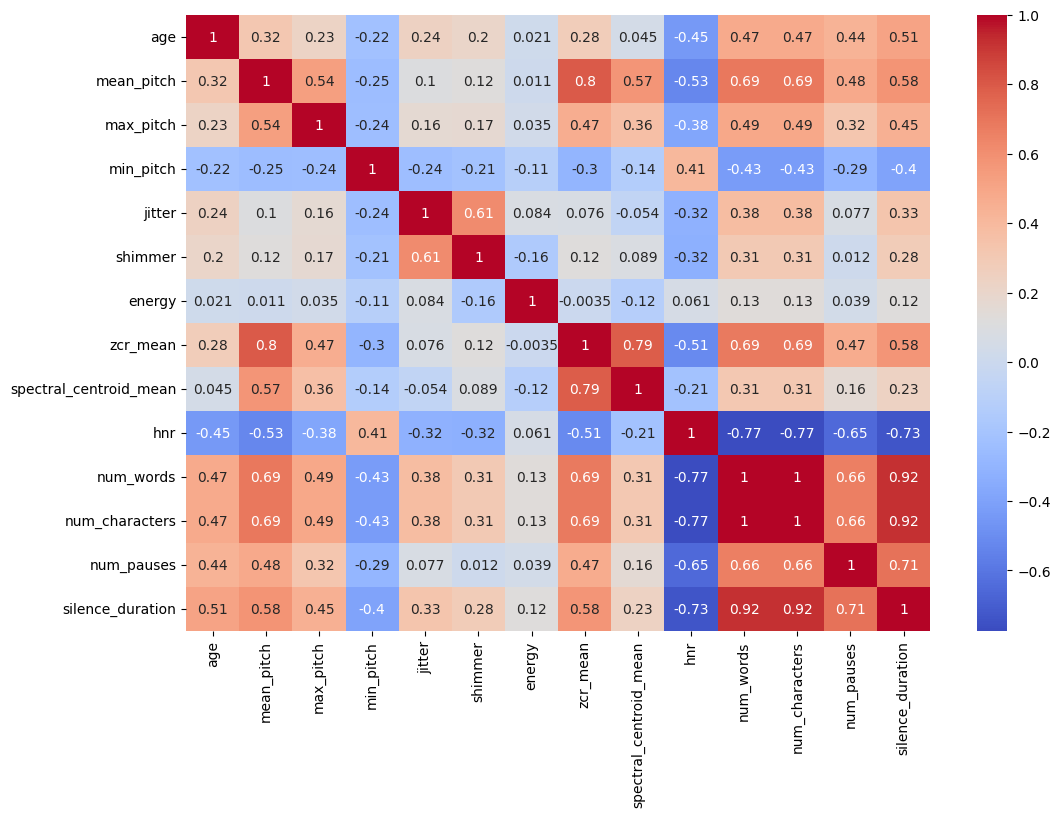

In [7]:
columns_to_exclude = ['Id', 'sampling_rate','gender','ethnicity']  
numerical_columns = dev_df.select_dtypes(include='number').drop(columns=columns_to_exclude, errors='ignore')

correlation = numerical_columns.corr()

plt.figure(figsize=(12, 8))  

sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()



In [8]:
threshold = 0.70
high_corr_pairs = []

for i in range(len(correlation.columns)):
    for j in range(i + 1, len(correlation.columns)):  # Evita duplicati e auto-correlazioni
        if abs(correlation.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation.columns[i], correlation.columns[j], correlation.iloc[i, j]))

# Stampa le coppie di feature altamente correlate
print("Coppie di feature altamente correlate (sopra 0.70 o sotto -0.70):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")

Coppie di feature altamente correlate (sopra 0.70 o sotto -0.70):
mean_pitch - zcr_mean: 0.80
zcr_mean - spectral_centroid_mean: 0.79
hnr - num_words: -0.77
hnr - num_characters: -0.77
hnr - silence_duration: -0.73
num_words - num_characters: 1.00
num_words - silence_duration: 0.92
num_characters - silence_duration: 0.92
num_pauses - silence_duration: 0.71


Considerando poi la correlazione di ogni coppia rispetto all'età, eliminiamo quella che ha una correlazione piu bassa quindi:
- zcr_mean
- num_words
- num_characters
- num_pauses

Feature Ranges:

spectral_centroid_mean    3452.015865
max_pitch                 3064.276940
mean_pitch                2377.918470
num_characters             281.000000
hnr                        206.097006
num_pauses                  96.000000
age                         91.000000
silence_duration            83.109252
num_words                   69.000000
min_pitch                   56.691560
zcr_mean                     0.320030
shimmer                      0.219962
energy                       0.129086
jitter                       0.088861
dtype: float64


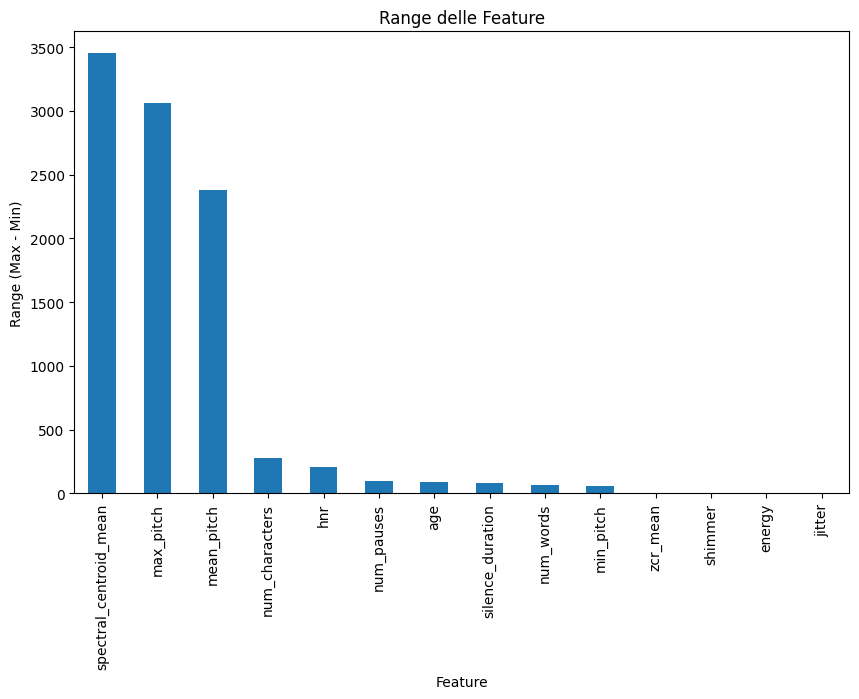

In [9]:
def analyze_feature_ranges(df):
    # Calcola il range (max - min) per ogni feature
    ranges = df.max() - df.min()
    
    # Ordina i range in ordine decrescente
    sorted_ranges = ranges.sort_values(ascending=False)
    
    print("Feature Ranges:\n")
    print(sorted_ranges)
    
    # Traccia un grafico a barre per visualizzare i range
    plt.figure(figsize=(10, 6))
    sorted_ranges.plot(kind='bar')
    plt.title('Range delle Feature')
    plt.ylabel('Range (Max - Min)')
    plt.xlabel('Feature')
    plt.show()

# Esegui la funzione sul tuo DataFrame
analyze_feature_ranges(numerical_columns)


Sarebbe meglio standardizzare:
- spectral_centroid_mean
- max_pitch
- mean_pitch

## Data transformation and feature extraction

In [10]:
Y_dev= dev_df['age'].values
dev_df.drop(columns=['age'], inplace=True)

In [11]:
df = pd.concat([dev_df, eval_df], ignore_index=True)
display(df)

,Id,sampling_rate,gender,ethnicity,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,path
0,0,22050,female,arabic,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,[151.99908088],-123.999726,69,281,39,23.846893,audios_development/1.wav
1,1,22050,female,hungarian,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,[129.19921875],-86.928478,69,281,21,19.388662,audios_development/2.wav
2,2,22050,female,portuguese,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,[117.45383523],-98.450670,69,281,1,21.640998,audios_development/3.wav
3,3,22050,female,english,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,[117.45383523],-56.459762,69,281,9,19.644127,audios_development/4.wav
4,4,22050,male,dutch,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,[112.34714674],-80.349204,69,281,11,18.041905,audios_development/5.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,686,22050,male,igbo,570.62740,3900.6730,145.67577,0.018842,0.079197,0.004545,0.072083,1946.502158,[112.34714674],-42.895295,6,15,1,1.861950,audios_evaluation/687.wav
3620,687,22050,male,igbo,974.13965,3919.0024,145.90408,0.024367,0.117492,0.000878,0.076900,3319.620800,[112.34714674],-144.881089,7,22,1,4.876190,audios_evaluation/688.wav
3621,688,22050,female,serbian,1113.27650,3999.3510,145.38307,0.020637,0.089355,0.009148,0.095613,1973.127197,[112.34714674],-73.559944,69,281,15,25.541950,audios_evaluation/689.wav
3622,689,22050,male,spanish,1759.17420,3999.4610,145.56773,0.026118,0.106429,0.003707,0.141474,2137.517812,[117.45383523],-93.562873,69,281,10,20.967619,audios_evaluation/690.wav


In [12]:
df["gender"].unique()

array(['female', 'male', 'famale'], dtype=object)

In [13]:
df["gender"] = df["gender"].replace("famale", "female")

In [14]:
def get_audio_duration_librosa(file_path):
    try:
        # Carica il file audio con librosa
        audio_data, sr = librosa.load(file_path, sr=None)
        
        # Calcola la durata del file audio
        duration = librosa.get_duration(y=audio_data, sr=sr)
        return duration
    except Exception as e:
        print(f"Errore nell'aprire il file audio con librosa: {e}")
        return None

In [15]:
def calculate_rate_of_speech(df):
    # Lista per contenere i valori di rate_of_speech
    rate_of_speech_values = []
    
    # Itera sulle righe del DataFrame
    for index, row in df.iterrows():
        # Ottieni il percorso completo aggiungendo './'
        full_path = './' + row['path']
        
        # Calcola la durata dell'audio con librosa
        duration = get_audio_duration_librosa(full_path)
        
        # Calcola la rate of speech se la durata è valida
        if duration is not None:
            rate_of_speech = row['num_words'] / duration
        else:
            rate_of_speech = None
        
        # Aggiungi il risultato alla lista
        rate_of_speech_values.append(rate_of_speech)
    
    # Aggiungi la nuova colonna al DataFrame
    df['rate_of_speech'] = rate_of_speech_values
    
    return df


In [16]:
df = calculate_rate_of_speech(df)


In [17]:
display(df)

,Id,sampling_rate,gender,ethnicity,mean_pitch,max_pitch,min_pitch,jitter,shimmer,energy,zcr_mean,spectral_centroid_mean,tempo,hnr,num_words,num_characters,num_pauses,silence_duration,path,rate_of_speech
0,0,22050,female,arabic,1821.69060,3999.7170,145.43066,0.013795,0.082725,0.002254,0.210093,3112.257251,[151.99908088],-123.999726,69,281,39,23.846893,audios_development/1.wav,1.966079
1,1,22050,female,hungarian,1297.81870,3998.8590,145.37268,0.025349,0.096242,0.007819,0.078849,1688.016389,[129.19921875],-86.928478,69,281,21,19.388662,audios_development/2.wav,2.957404
2,2,22050,female,portuguese,1332.85240,3998.8025,145.42395,0.019067,0.119456,0.002974,0.105365,2576.901706,[117.45383523],-98.450670,69,281,1,21.640998,audios_development/3.wav,3.184435
3,3,22050,female,english,1430.34990,3998.4510,147.98083,0.017004,0.102389,0.022371,0.173701,3269.751413,[117.45383523],-56.459762,69,281,9,19.644127,audios_development/4.wav,3.069813
4,4,22050,male,dutch,1688.72340,3998.6113,145.44772,0.028027,0.124831,0.005369,0.107279,1930.897375,[112.34714674],-80.349204,69,281,11,18.041905,audios_development/5.wav,3.614406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,686,22050,male,igbo,570.62740,3900.6730,145.67577,0.018842,0.079197,0.004545,0.072083,1946.502158,[112.34714674],-42.895295,6,15,1,1.861950,audios_evaluation/687.wav,2.963725
3620,687,22050,male,igbo,974.13965,3919.0024,145.90408,0.024367,0.117492,0.000878,0.076900,3319.620800,[112.34714674],-144.881089,7,22,1,4.876190,audios_evaluation/688.wav,1.414951
3621,688,22050,female,serbian,1113.27650,3999.3510,145.38307,0.020637,0.089355,0.009148,0.095613,1973.127197,[112.34714674],-73.559944,69,281,15,25.541950,audios_evaluation/689.wav,2.510434
3622,689,22050,male,spanish,1759.17420,3999.4610,145.56773,0.026118,0.106429,0.003707,0.141474,2137.517812,[117.45383523],-93.562873,69,281,10,20.967619,audios_evaluation/690.wav,3.189623


In [18]:
x_list = []
sr_list= []
mfcc_list = []
for index, row in df.iterrows():
    full_path = './' + row['path']

    x, sr = librosa.load(full_path)
    mfccs = np.mean(librosa.power_to_db(librosa.feature.mfcc(y=x, n_mfcc=13, sr=sr), ref=np.max).T, axis = 0)
  
    # Append values in lists
    x_list.append(x)
    sr_list.append(sr)
    mfcc_list.append(mfccs)



In [19]:
for i in range(13):
    # Calcola la media dell'MFCC lungo i frame (asse 1)
    df[f"MFCC_{i+1}"] = [mfcc[i] for mfcc in mfcc_list]

In [20]:
len(mfcc_list)

3624

In [21]:
#df = pd.get_dummies(df, columns=['gender', 'ethnicity'])

In [22]:
df["pitch_range"] = df["max_pitch"] - df["min_pitch"]

In [23]:
df = df.drop(columns=["max_pitch", "min_pitch", "num_words", "path", "num_characters", "Id", "sampling_rate"])

In [24]:
df = df.drop(columns=["ethnicity"])

In [25]:
df = df.drop(columns=["num_pauses"])

In [26]:
df = df.drop(columns=["zcr_mean"])

In [27]:
df['tempo'] = df['tempo'].str.replace('[','').str.replace(']','').astype(float)


In [28]:
df["gender"] = df["gender"].map({"female": 1, "male": 0})

In [29]:
display(df)

,gender,mean_pitch,jitter,shimmer,energy,spectral_centroid_mean,tempo,hnr,silence_duration,rate_of_speech,...,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,MFCC_11,MFCC_12,MFCC_13,pitch_range
0,1,1821.69060,0.013795,0.082725,0.002254,3112.257251,151.999081,-123.999726,23.846893,1.966079,...,-57.111164,-73.320061,-60.533875,-74.988846,-78.588921,-69.377769,-78.386253,-46.280113,-73.096657,3854.28634
1,1,1297.81870,0.025349,0.096242,0.007819,1688.016389,129.199219,-86.928478,19.388662,2.957404,...,-31.287666,-57.091976,-51.658798,-58.857845,-37.894653,-62.639515,-66.761551,-46.323338,-72.384605,3853.48632
2,1,1332.85240,0.019067,0.119456,0.002974,2576.901706,117.453835,-98.450670,21.640998,3.184435,...,-24.087017,-35.852566,-37.486526,-40.349045,-58.963436,-26.393042,-44.497120,-45.374157,-38.255402,3853.37855
3,1,1430.34990,0.017004,0.102389,0.022371,3269.751413,117.453835,-56.459762,19.644127,3.069813,...,-59.334583,-67.390335,-75.252213,-60.852009,-73.404121,-63.042892,-50.150448,-69.212479,-70.148239,3850.47017
4,0,1688.72340,0.028027,0.124831,0.005369,1930.897375,112.347147,-80.349204,18.041905,3.614406,...,-18.042650,-50.455147,-47.369843,-21.264757,-75.514534,-50.401180,-43.778351,-65.983940,-40.421505,3853.16358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,0,570.62740,0.018842,0.079197,0.004545,1946.502158,112.347147,-42.895295,1.861950,2.963725,...,-18.793739,-47.472286,-52.317371,-39.998421,-53.970776,-45.178875,-36.874840,-66.370636,-51.162426,3754.99723
3620,0,974.13965,0.024367,0.117492,0.000878,3319.620800,112.347147,-144.881089,4.876190,1.414951,...,-12.808498,-55.734581,-22.845060,-21.174458,-68.686890,-12.167247,-23.978361,-71.695648,-17.912672,3773.09832
3621,1,1113.27650,0.020637,0.089355,0.009148,1973.127197,112.347147,-73.559944,25.541950,2.510434,...,-30.263092,-37.771591,-51.953918,-51.995228,-48.558647,-54.823162,-53.073669,-30.944548,-49.706043,3853.96793
3622,0,1759.17420,0.026118,0.106429,0.003707,2137.517812,117.453835,-93.562873,20.967619,3.189623,...,-72.369286,-31.632429,-35.679363,-72.904747,-27.628141,-72.951714,-22.536640,-60.788818,-42.627899,3853.89327


In [30]:
df.dtypes

gender                      int64
mean_pitch                float64
jitter                    float64
shimmer                   float64
energy                    float64
spectral_centroid_mean    float64
tempo                     float64
hnr                       float64
silence_duration          float64
rate_of_speech            float64
MFCC_1                    float32
MFCC_2                    float32
MFCC_3                    float32
MFCC_4                    float32
MFCC_5                    float32
MFCC_6                    float32
MFCC_7                    float32
MFCC_8                    float32
MFCC_9                    float32
MFCC_10                   float32
MFCC_11                   float32
MFCC_12                   float32
MFCC_13                   float32
pitch_range               float64
dtype: object

In [31]:
columns_to_scale = ["spectral_centroid_mean", "pitch_range", "mean_pitch", "tempo", "hnr", "silence_duration" ]
columns_to_scale.extend([f"MFCC_{i}" for i in range(1, 14)])

# Inizializza lo StandardScaler
scaler = StandardScaler()

# Applica lo scaler solo alle colonne selezionate
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

Feature Ranges:

MFCC_1                    56.534660
silence_duration           7.631475
MFCC_2                     7.041774
spectral_centroid_mean     7.031867
tempo                      6.990316
MFCC_4                     6.541872
pitch_range                5.908081
mean_pitch                 5.831692
MFCC_6                     5.461307
hnr                        5.384093
MFCC_5                     5.183598
MFCC_13                    5.178169
MFCC_9                     4.783813
MFCC_3                     4.743058
MFCC_10                    4.719418
MFCC_8                     4.514385
rate_of_speech             4.487156
MFCC_11                    4.362878
MFCC_12                    4.342245
MFCC_7                     4.060435
gender                     1.000000
shimmer                    0.230166
energy                     0.129086
jitter                     0.088861
dtype: float64


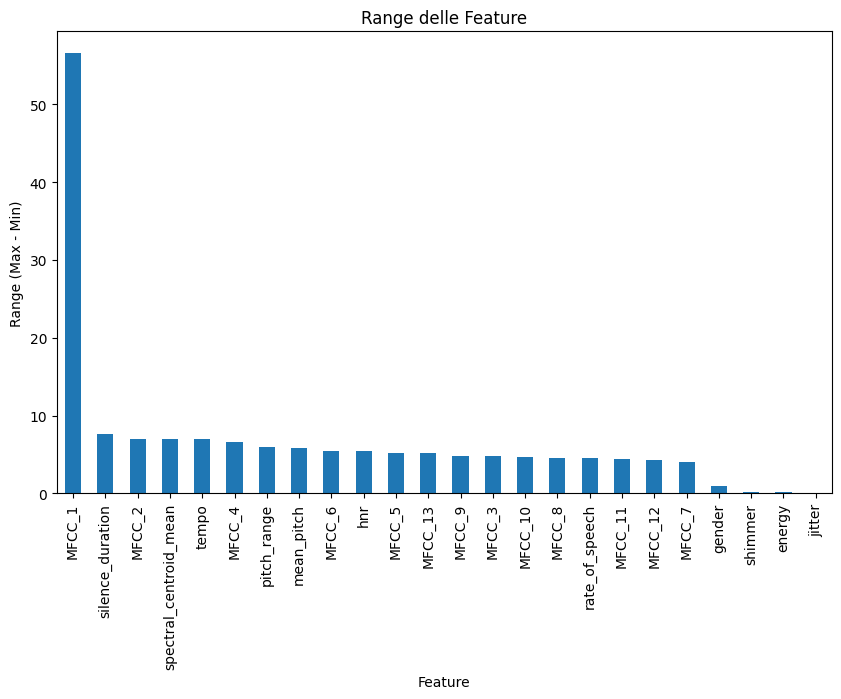

In [32]:
# Esegui la funzione sul tuo DataFrame
analyze_feature_ranges(df)

In [33]:
from sklearn.model_selection import train_test_split

X = df[:2933]
y = Y_dev

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

In [34]:
from prettytable import PrettyTable
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np

# Degree for polynomial features
degree = 5

# List of models and their names
models = [
    LinearRegression(),
    Ridge(random_state=42),
    MLPRegressor(hidden_layer_sizes=(10,), random_state=42, max_iter=10000),
    MLPRegressor(hidden_layer_sizes=(10, 10), activation='tanh', solver='lbfgs',
                 alpha=0.000, batch_size='auto', learning_rate='constant',
                 learning_rate_init=0.01, power_t=0.5, max_iter=10000, shuffle=True,
                 random_state=42, tol=0.0001, verbose=False, warm_start=False,
                 momentum=0.0, nesterovs_momentum=False, early_stopping=False,
                 validation_fraction=0.0, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
    SVR(gamma='scale'),
    RandomForestRegressor(n_estimators=300),
    GradientBoostingRegressor(n_estimators=300, random_state=42),
    ExtraTreesRegressor(n_estimators=300, random_state=42),
    KNeighborsRegressor(n_neighbors=5),
    make_pipeline(
        make_column_transformer(
            (FunctionTransformer(np.sin), [0]),
            (PolynomialFeatures(degree), [0])
        ),
        LinearRegression()
    ),
    make_pipeline(
        make_column_transformer(
            (FunctionTransformer(np.sin), [0]),
            (PolynomialFeatures(degree), [0])
        ),
        Ridge(alpha=1)
    )
]

names = [
    'linreg',
    'ridge',
    'mlp_standard',
    'mlp_tuned',
    'svr',
    'rf',
    'gradient_boosting',
    'extra_trees',
    'knn',
    f'sin+poly{degree}+linreg',
    f'sin+poly{degree}+ridge'
]

# PrettyTable for results
t = PrettyTable()
t.field_names = ['Model', 'R2 Score', 'RMSE']

# Test each model
for model, name in zip(models, names):
    try:
        # Check if the model requires standardized data
        if isinstance(model, (LinearRegression, Ridge, MLPRegressor, SVR, GradientBoostingRegressor, ExtraTreesRegressor)):
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
        else:
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
        
        # Calculate R2 and RMSE
        mse = mean_squared_error(y_test, y_test_pred)
        rmse = np.sqrt(mse)
        t.add_row([name, f"{mse:.4f}", f"{rmse:.4f}"])
    except Exception as e:
        # Handle errors during fitting or prediction
        t.add_row([name, "Error", str(e)])

# Print the results table
print(t)


/Users/alicebanaudi/Università/Data_Science_Lab/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


+-------------------+----------+---------+
|       Model       | R2 Score |   RMSE  |
+-------------------+----------+---------+
|       linreg      | 104.3315 | 10.2143 |
|       ridge       | 105.1850 | 10.2560 |
|    mlp_standard   | 101.1881 | 10.0592 |
|     mlp_tuned     | 154.4146 | 12.4264 |
|        svr        | 115.0630 | 10.7267 |
|         rf        | 96.3149  |  9.8140 |
| gradient_boosting | 106.3758 | 10.3139 |
|    extra_trees    | 96.0175  |  9.7989 |
|        knn        | 111.5566 | 10.5620 |
|  sin+poly5+linreg | 166.5183 | 12.9042 |
|  sin+poly5+ridge  | 166.6907 | 12.9109 |
+-------------------+----------+---------+


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(
)


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2,  10],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    scoring='neg_root_mean_squared_error',  # RMSE as the target metric
    cv=5,  # Number of folds in cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best results
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tota

In [36]:
etr = ExtraTreesRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2,  10],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=etr, 
    param_grid=param_grid, 
    scoring='neg_root_mean_squared_error',  # RMSE as the target metric
    cv=5,  # Number of folds in cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best results
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; to

In [41]:
#Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

# Train the model with the best hyperparameters
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="sqrt",
    bootstrap=False,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate R2 and RMSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2:.4f}, RMSE: {rmse:.4f}")

R2 Score: 0.4340, RMSE: 9.6824


In [43]:
y_pred_rf = rf.predict(df[2933:])
results = pd.DataFrame({
    'Id': eval_df['Id'],  
    'Predicted': y_pred_rf
})

results.to_csv('submission_rf_test.csv', index=False)


In [44]:
# Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
etr = ExtraTreesRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features=None,
    bootstrap=False,
    random_state=42
)

etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)

# Calculate R2 and RMSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2:.4f}, RMSE: {rmse:.4f}")

R2 Score: 0.4275, RMSE: 9.7384


In [40]:
y_pred_etr = etr.predict(df[2933:])
results = pd.DataFrame({
    'Id': eval_df['Id'],  
    'Predicted': y_pred_etr
})

results.to_csv('submission_etr.csv', index=False)
